In [1]:
# !pip install seaborn
# !pip install sklearn
# !pip install --user scikit-learn
# !pip install matplotlib
# !pip install nltk

In [2]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
data = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.columns = ["class","message"]

In [8]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['length'] = [len(d) for d in data.message]

In [10]:
data.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
data.groupby('class').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.021347  58.014768   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.429719  29.049857  13.0  132.0  149.0  157.0  223.0

<AxesSubplot:xlabel='class', ylabel='count'>

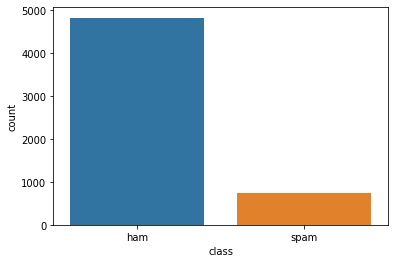

In [12]:
sns.countplot(x=data['class'])

<AxesSubplot:xlabel='class', ylabel='length'>

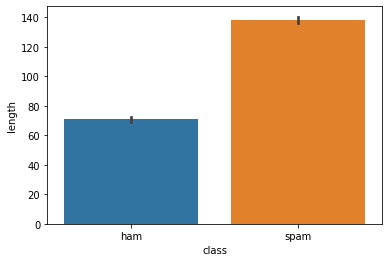

In [13]:
sns.barplot(x=data["class"],y=data["length"])

In [14]:
data.drop(["length"],axis=1,inplace=True)

In [15]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [17]:
data['message'].apply(transform_message)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, �750, Pou...
5568                   [�, b, going, esplanade, fr, home]
5569                   [Pity, , mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [18]:
vectorization = CountVectorizer(analyzer=transform_message)

In [19]:
X = vectorization.fit(data["message"])

In [20]:
X_transform = X.transform(data["message"])

In [21]:
print(X_transform)

  (0, 1098)	1
  (0, 1463)	1
  (0, 2029)	1
  (0, 4576)	1
  (0, 5137)	1
  (0, 5138)	1
  (0, 5687)	1
  (0, 6133)	1
  (0, 6817)	1
  (0, 6848)	1
  (0, 7458)	1
  (0, 7569)	1
  (0, 8233)	1
  (0, 8811)	1
  (0, 10848)	1
  (0, 11046)	1
  (1, 2409)	1
  (1, 3014)	1
  (1, 7602)	1
  (1, 8484)	1
  (1, 10584)	1
  (1, 10955)	1
  (2, 75)	1
  (2, 424)	1
  (2, 431)	1
  :	:
  (5568, 6793)	1
  (5568, 7067)	1
  (5568, 11238)	1
  (5569, 0)	1
  (5569, 3171)	1
  (5569, 3657)	1
  (5569, 8149)	1
  (5569, 10089)	1
  (5570, 4432)	1
  (5570, 4975)	1
  (5570, 5171)	1
  (5570, 6198)	1
  (5570, 6614)	1
  (5570, 6712)	1
  (5570, 6894)	1
  (5570, 7192)	1
  (5570, 7299)	1
  (5570, 7700)	1
  (5570, 8316)	1
  (5570, 9806)	1
  (5570, 10672)	1
  (5570, 10889)	1
  (5571, 3372)	1
  (5571, 8245)	1
  (5571, 10534)	1


In [22]:
tfidf_transformer = TfidfTransformer().fit(X_transform)

In [23]:
X_tfidf = tfidf_transformer.transform(X_transform)

In [24]:
print(X_tfidf.shape)

(5572, 11304)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['class'], test_size=0.3,random_state = 50, stratify=data['class'])  

In [26]:
X_train,y_train

(357     Ur cash-balance is currently 500 pounds - to m...
 4793          Sorry that was my uncle. I.ll keep in touch
 2542                         Aiyo please �_ got time meh.
 1695    Finish already... Yar they keep saying i mushy...
 547                      Sorry that took so long, omw now
                               ...                        
 5170    I'm in school now n i'll be in da lab doing so...
 1677             Lol where do u come up with these ideas?
 3813                       Can. Dunno wat to get 4 her...
 4061    Hi dear we saw dear. We both are happy. Where ...
 198     Hi its Kate how is your evening? I hope i can ...
 Name: message, Length: 3900, dtype: object,
 357     spam
 4793     ham
 2542     ham
 1695     ham
 547      ham
         ... 
 5170     ham
 1677     ham
 3813     ham
 4061     ham
 198      ham
 Name: class, Length: 3900, dtype: object)

In [27]:
bow = CountVectorizer(stop_words='english')

In [28]:
# Fit the bag of words on the training docs
bow.fit(X_train)

CountVectorizer(stop_words='english')

In [29]:
X_train = bow.transform(X_train)
X_test = bow.transform(X_test)

In [30]:
X_train,X_test

(<3900x6843 sparse matrix of type '<class 'numpy.int64'>'
 	with 30002 stored elements in Compressed Sparse Row format>,
 <1672x6843 sparse matrix of type '<class 'numpy.int64'>'
 	with 11581 stored elements in Compressed Sparse Row format>)

****Naive Bayes Classifier

In [31]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [32]:
print(f'Accuracy : {accuracy_score(y_test, naive_bayes.predict(X_test)):.3f}')
print(f'Precision : {precision_score(y_test, naive_bayes.predict(X_test), pos_label="spam"):.3f}')
print(f'Recall : {recall_score(y_test, naive_bayes.predict(X_test), pos_label="spam"):.3f}')
print(f'F1-Score : {f1_score(y_test, naive_bayes.predict(X_test), pos_label="spam"):.3f}')

Accuracy : 0.983
Precision : 0.967
Recall : 0.906
F1-Score : 0.935


In [33]:
predictions = naive_bayes.predict(X_test)

In [34]:
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [35]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.97      0.91      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



****Support Vector Machine Classifier

In [36]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

In [37]:
print(f'Accuracy : {accuracy_score(y_test, svm_clf.predict(X_test)):.3f}')
print(f'Precision : {precision_score(y_test, svm_clf.predict(X_test), pos_label="spam"):.3f}')
print(f'Recall : {recall_score(y_test, svm_clf.predict(X_test), pos_label="spam"):.3f}')
print(f'F1-Score : {f1_score(y_test, svm_clf.predict(X_test), pos_label="spam"):.3f}')

Accuracy : 0.979
Precision : 0.990
Recall : 0.853
F1-Score : 0.916


In [38]:
svm_predictions = svm_clf.predict(X_test)

In [39]:
print (classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.99      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

